In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [146]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
data =pd.concat((train_data, test_data),sort=False).reset_index(drop=True) 


In [147]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [148]:
data.info() # 2919筆

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [149]:
#使用 inplace修改，axis=1 刪除 行
data.drop("Id",inplace = True,axis=1) 


In [69]:
data.head(10) #.head()可以查看前幾筆資料，括號填入數字

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [7]:
# 顯示缺失值筆數
# import seaborn as sns
# import matplotlib.pyplot as plt
# missing_values = data.isnull().sum().sort_values(ascending=False)
# # 去掉缺失值為0的值
# missing_values = missing_values[missing_values != 0] 
# fig,ax=plt.subplots(figsize=(7,7))
# sns.barplot(x=missing_values.values,y=missing_values.index)

# for i, v in enumerate(missing_values.values):
#     ax.text(v + 0.1, i, str(v), color='black', ha='left')
# plt.show()    

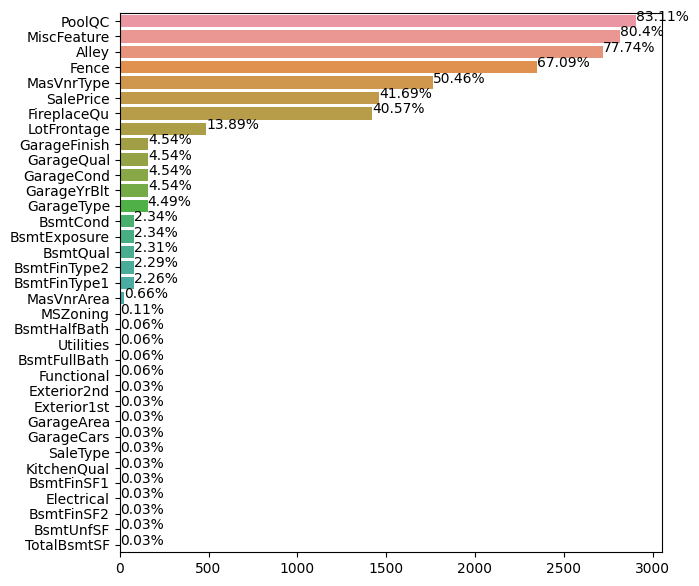

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
missing_values = data.isnull().sum().sort_values(ascending=False)
# 去掉缺失值為0的值
missing_values = missing_values[missing_values != 0] 

percentage = round(missing_values/len(missing_values), 2)

fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(x=missing_values.values,y=missing_values.index, ax=ax)

for i, p in enumerate(percentage):
    ax.text(missing_values.values[i] + 0.1, i, f'{p}%', color='black', ha='left')

plt.show()    

In [151]:
drop_column = missing_values[percentage >80] 
drop_column

PoolQC         2909
MiscFeature    2814
dtype: int64

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# 選擇類別型態的欄位
df_cat = data.select_dtypes(include='object')

df_cat 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


<Figure size 1000x600 with 0 Axes>

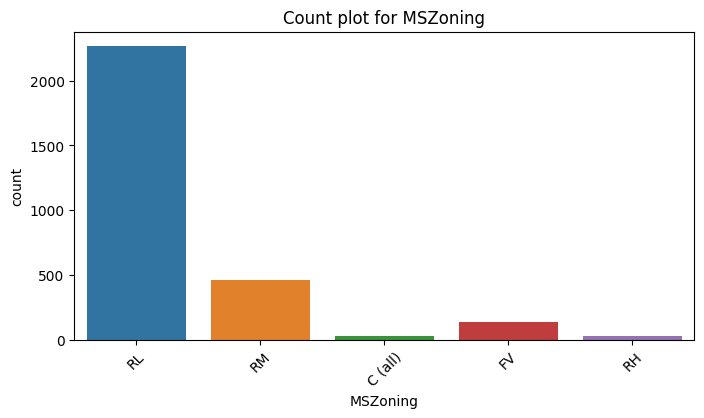

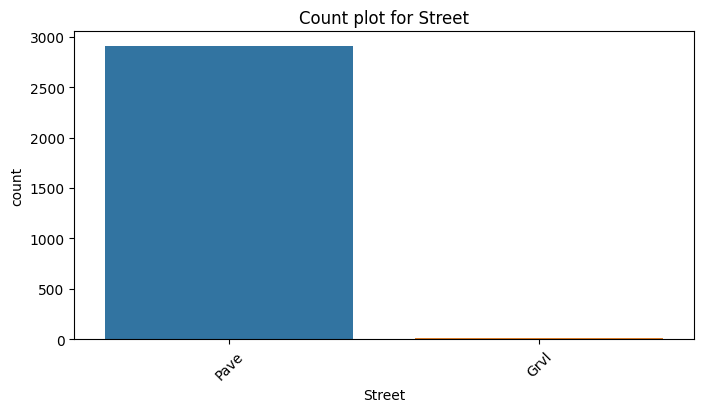

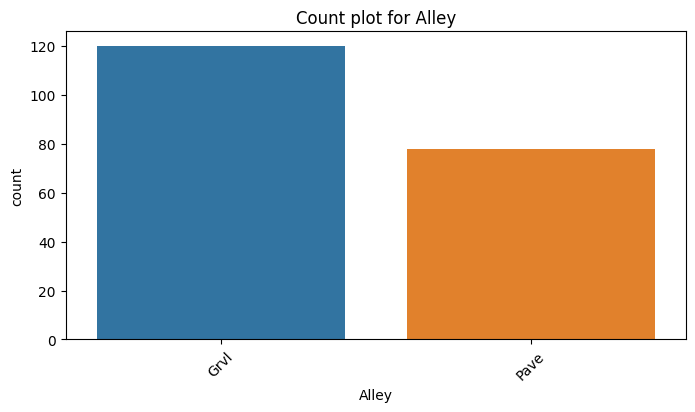

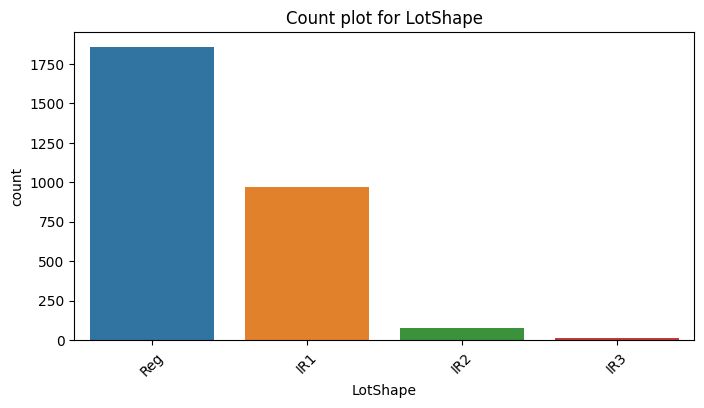

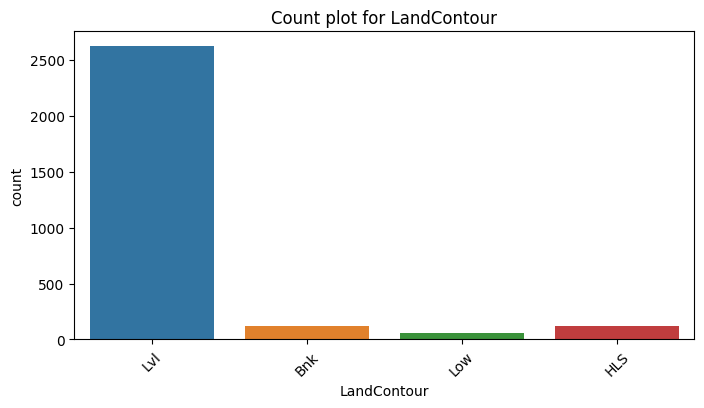

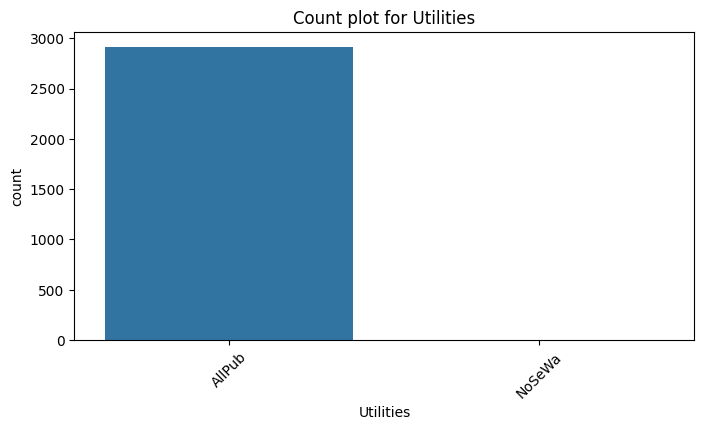

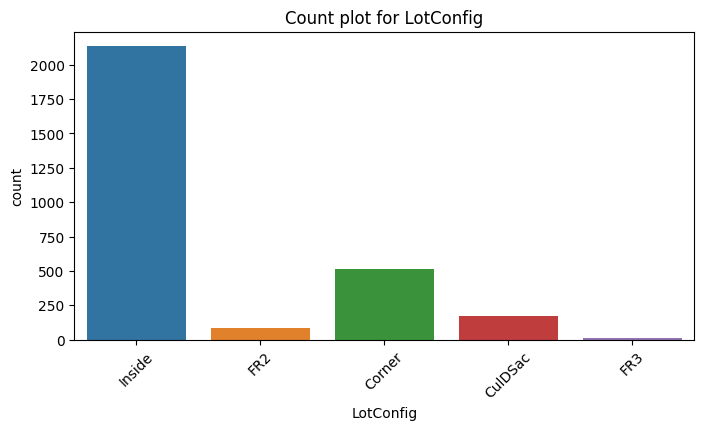

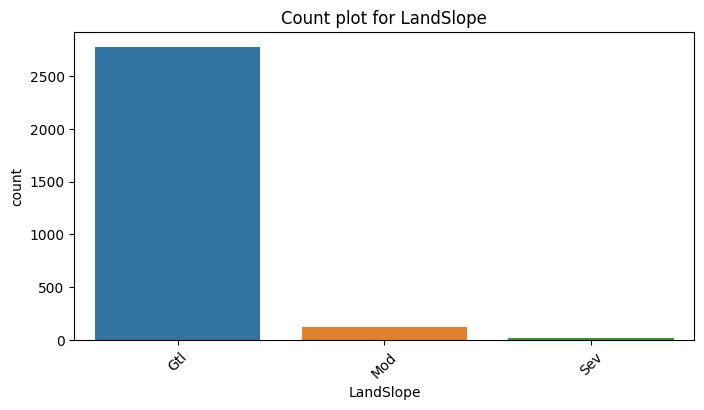

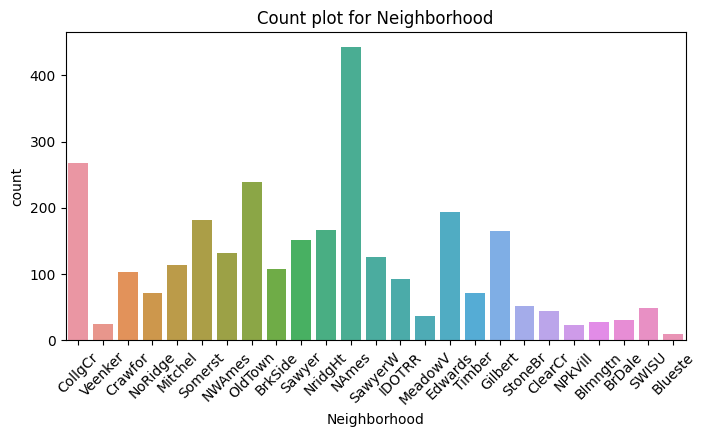

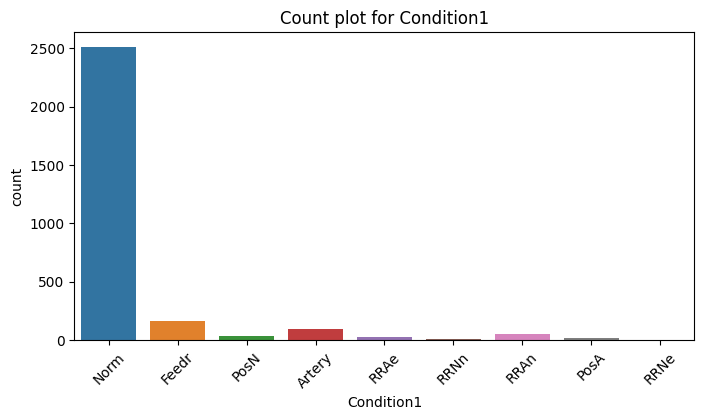

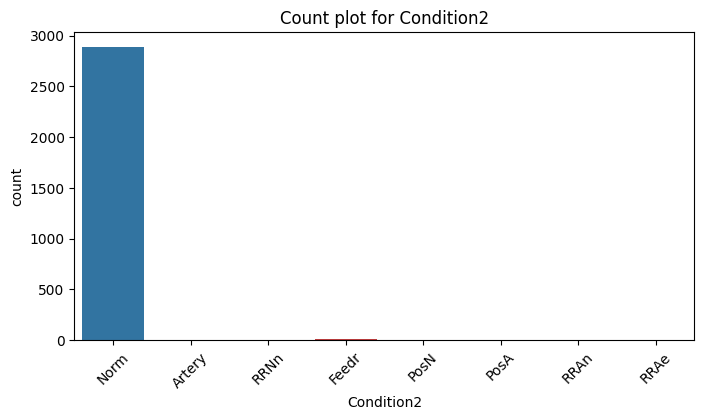

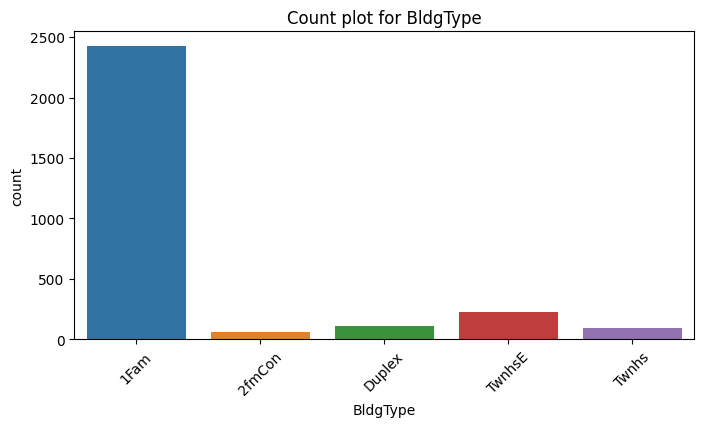

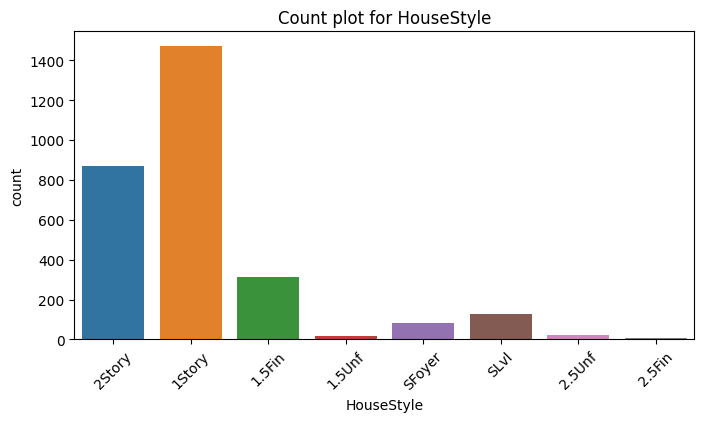

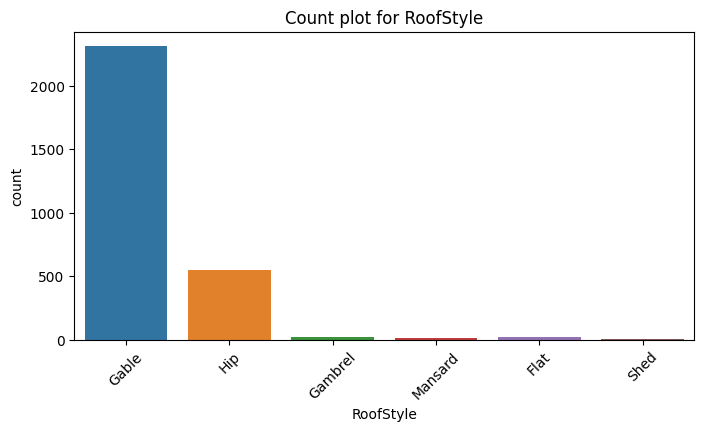

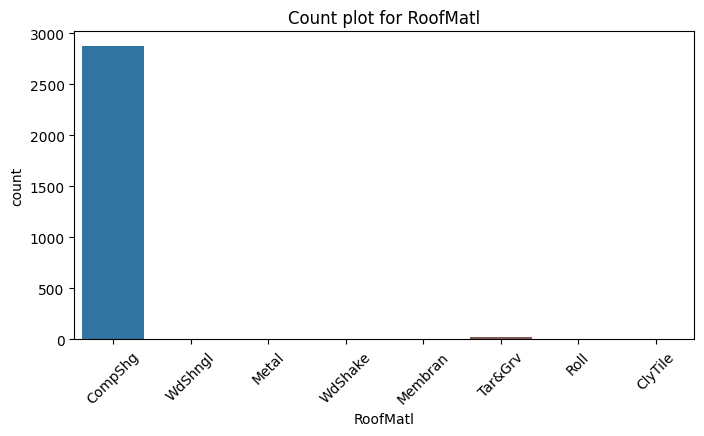

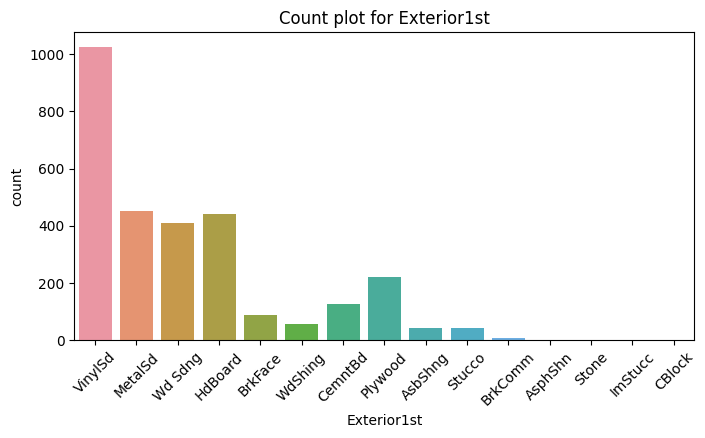

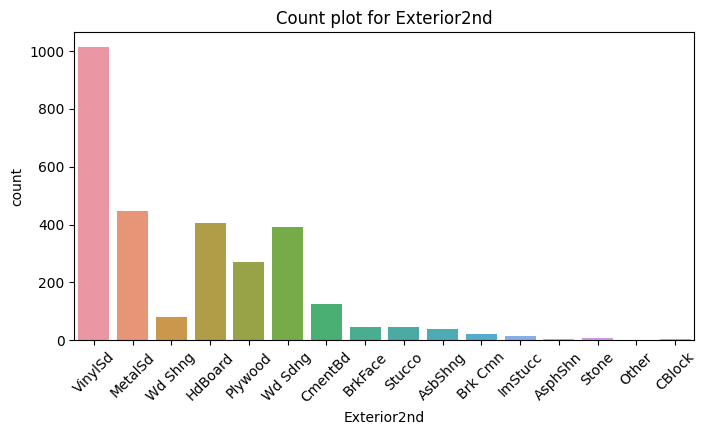

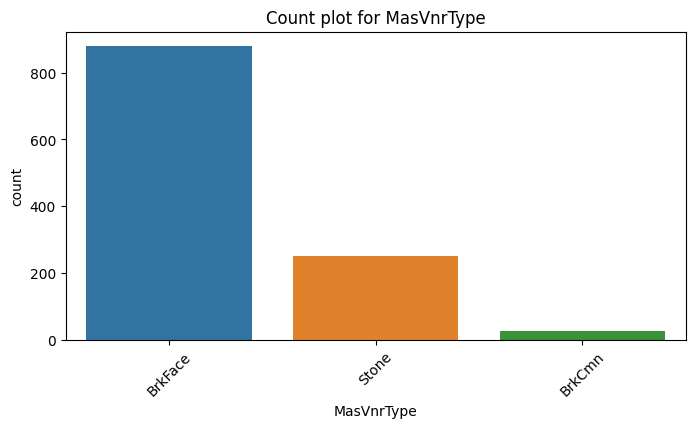

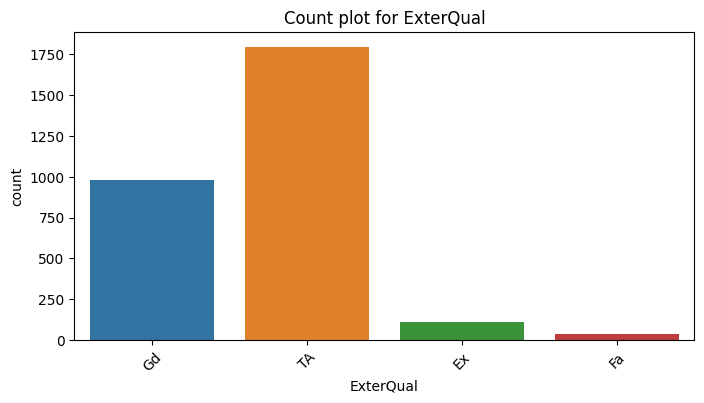

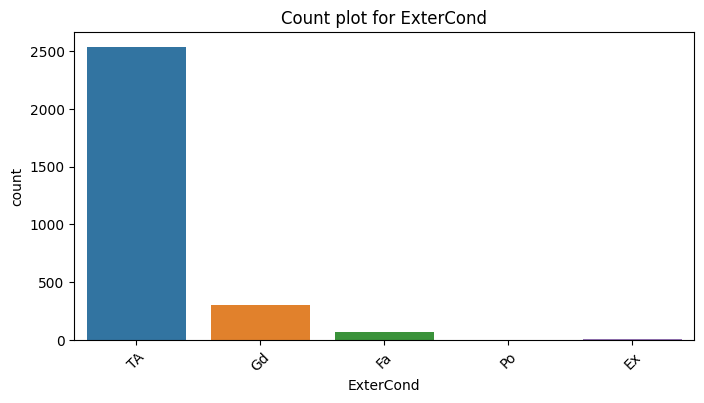

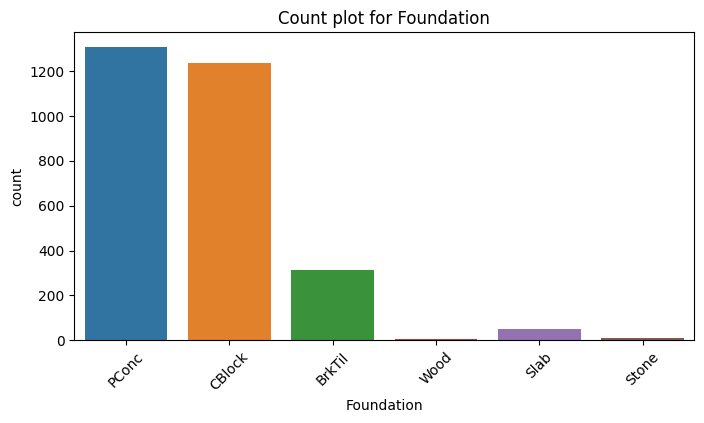

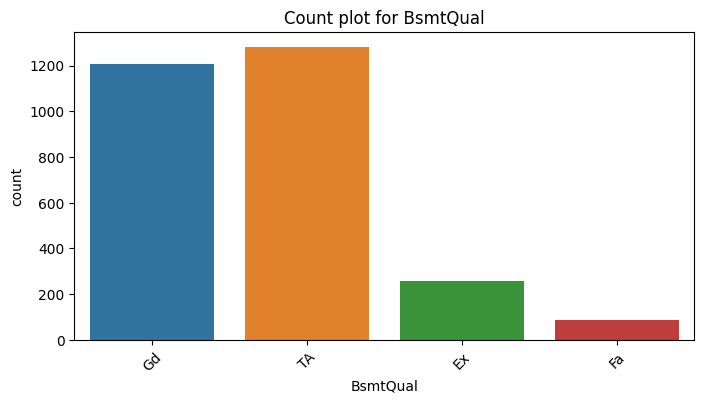

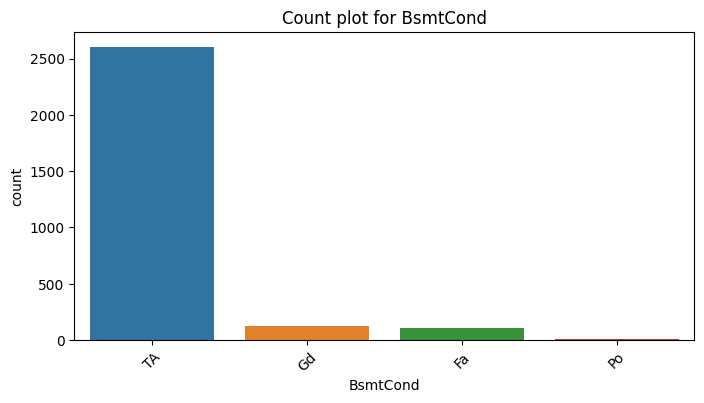

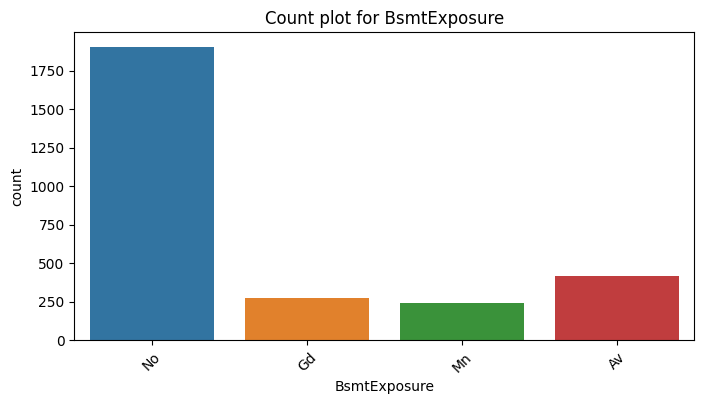

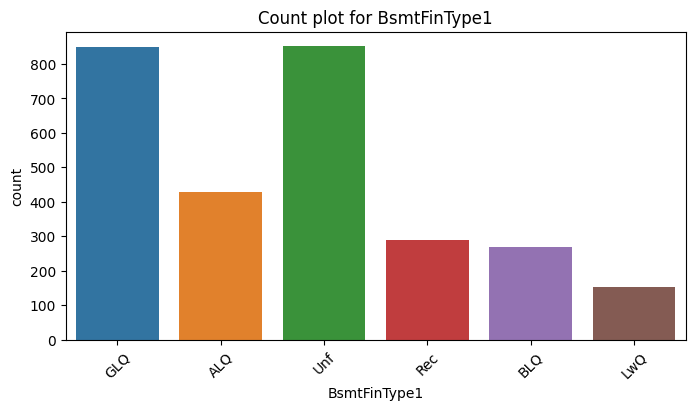

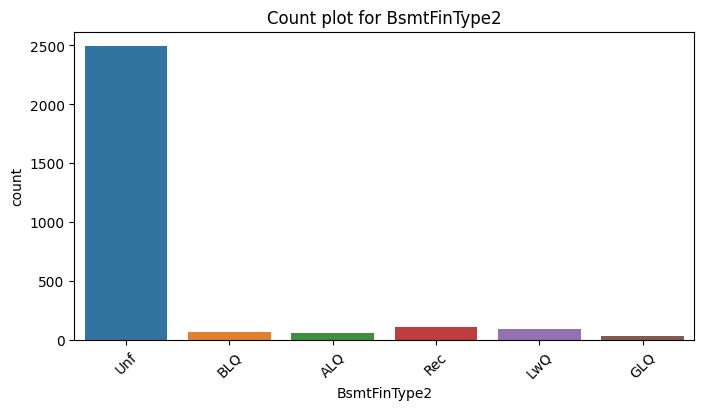

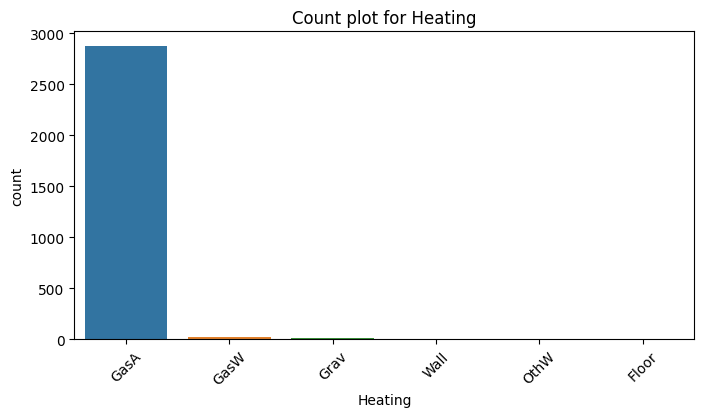

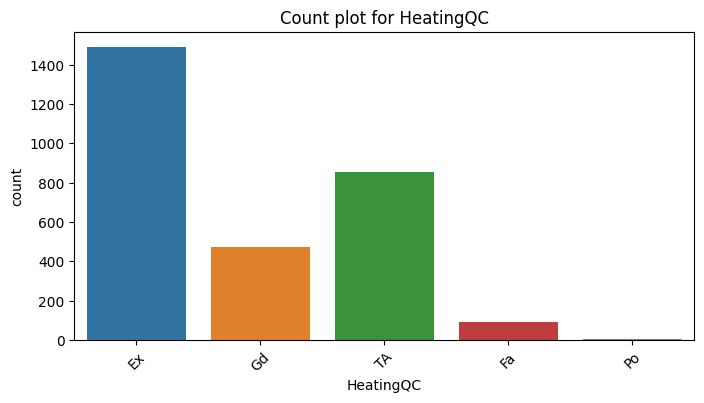

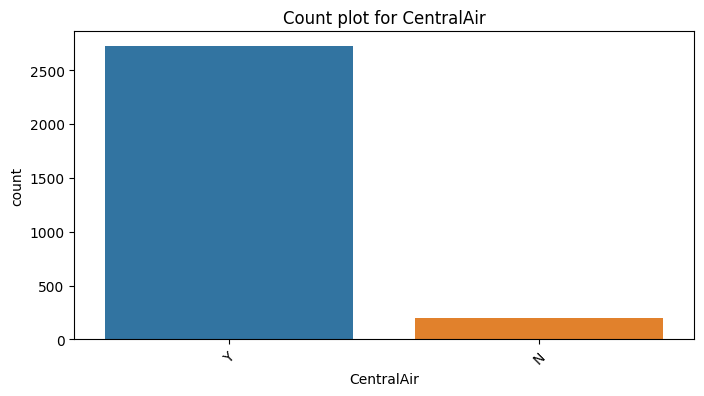

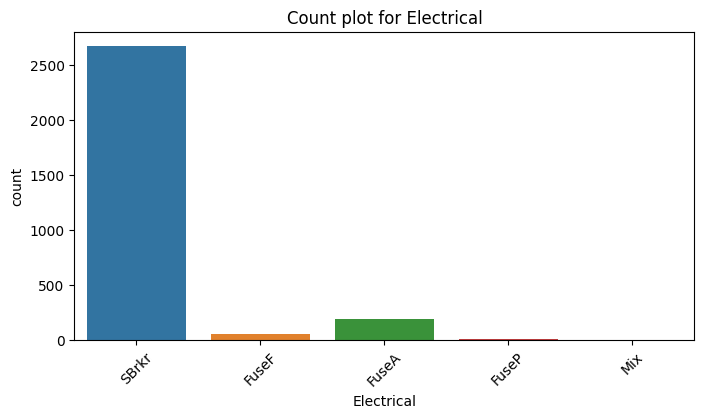

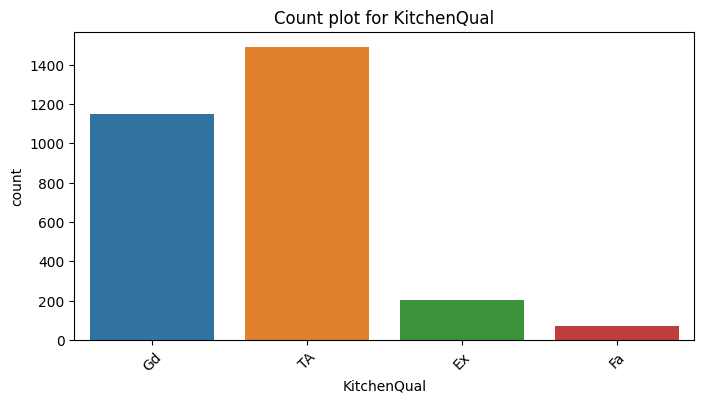

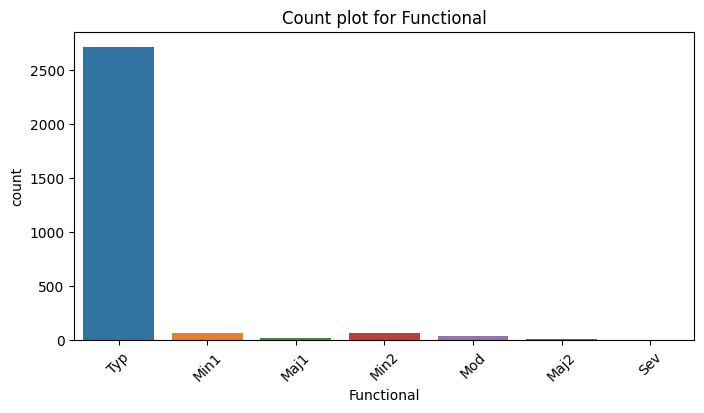

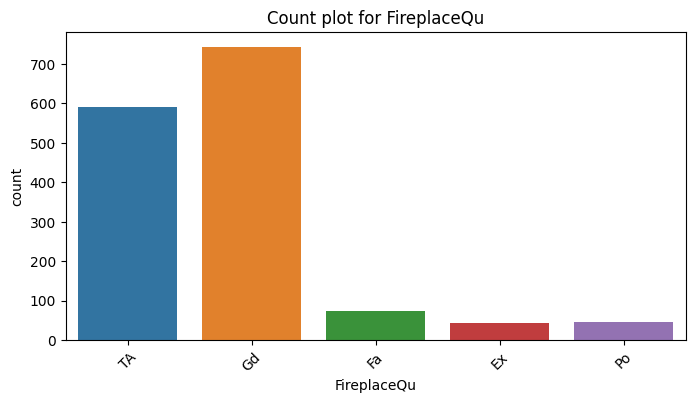

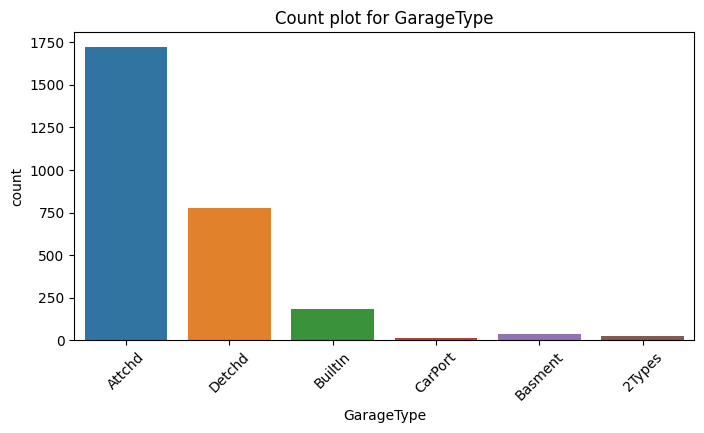

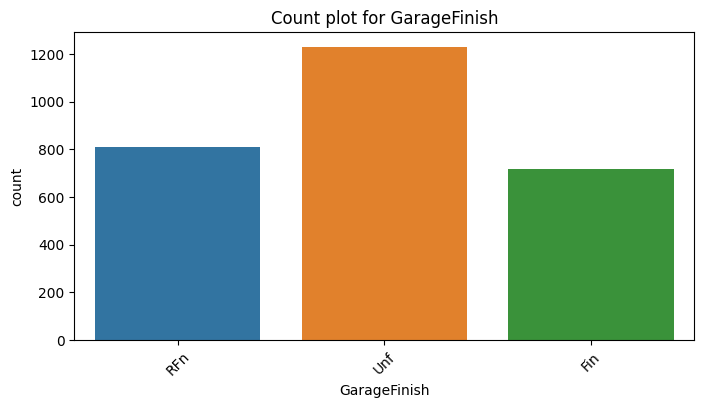

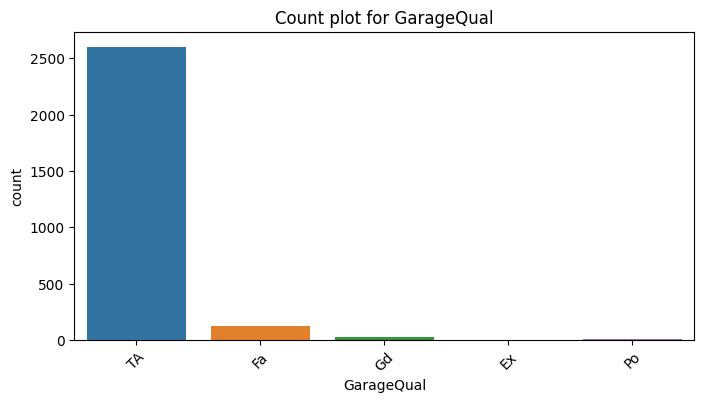

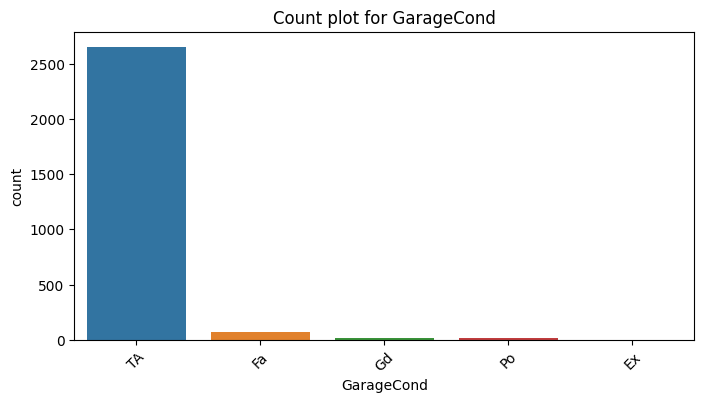

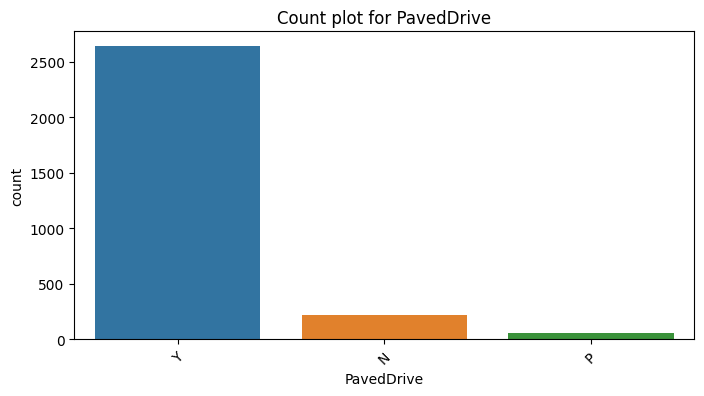

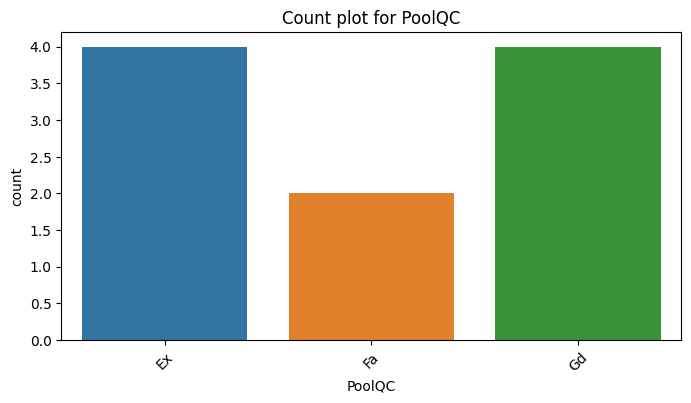

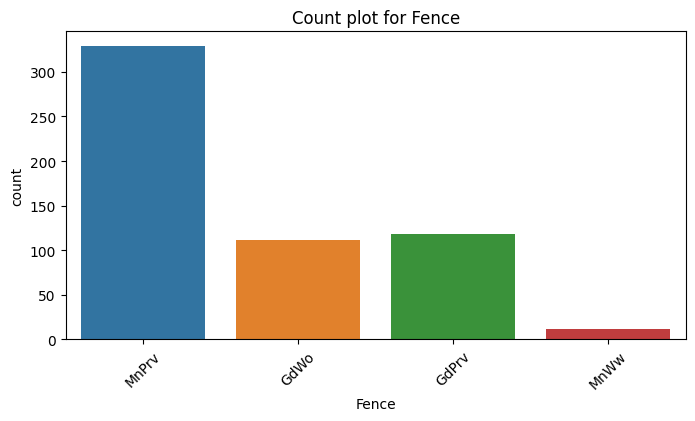

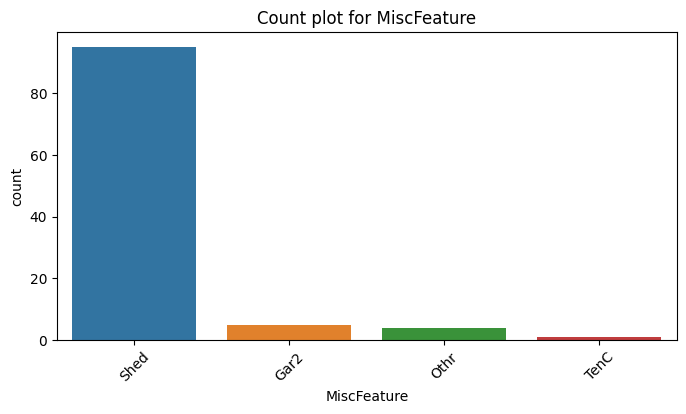

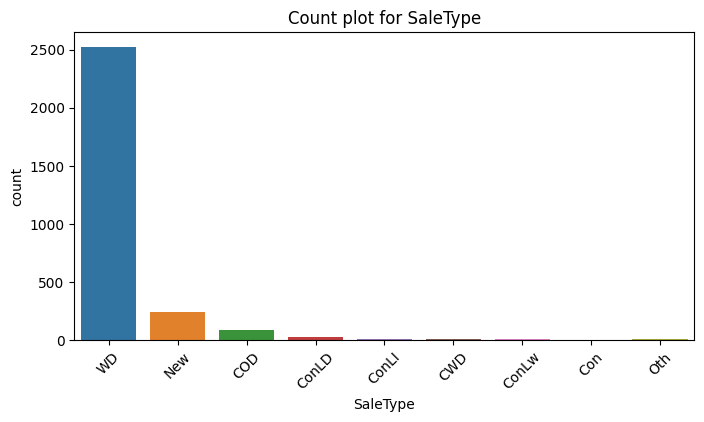

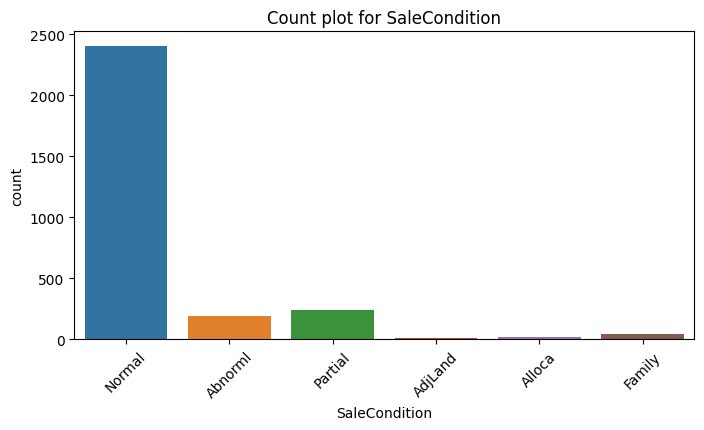

In [153]:
# 選擇類別型態的欄位
df_cat = data.select_dtypes(include='object')

# 設置圖表大小
plt.figure(figsize=(10, 6))

# 使用迴圈遍歷每個類別型態的欄位，並依次繪製計數圖
for column in df_cat.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_cat[column])
    plt.title(f'Count plot for {column}')
    plt.xticks(rotation=45)
    plt.show()


In [154]:
# 去除分布差異太大或遺漏值太多的欄位
data = data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC', 'MiscFeature', 'Alley', 'Fence'],
axis=1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [155]:
#處裡類別型態資料=none
missing_cat = data.select_dtypes(include='object') # 多種型態 = []
missing_cat = missing_cat.isnull().sum().sort_values(ascending=False)
missing_cat = missing_cat[missing_cat != 0] 
# missing_cat
for column in missing_cat.index:
    data[column] = data[column].fillna('none')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [156]:
# 處理數值型態資料
missing_num = data.select_dtypes(include=['int64','float64'])
missing_num = missing_num.isnull().sum().sort_values(ascending=False)

# missing_num
for column in missing_num.index:
    data[column] = data[column].fillna(0)
data


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,0.0
2915,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,4,2006,WD,Abnorml,0.0
2916,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,0.0
2917,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,700,7,2006,WD,Normal,0.0


In [157]:
# GarageYrBlt
count_Garage = (data['GarageYrBlt']== 0).sum()
print("缺失值的數量：", count_Garage)

缺失值的數量： 159


In [158]:
# 將值為0的補上平均數(整數位)
data['GarageYrBlt'] = data['GarageYrBlt'].replace(0, np.nan)
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(int(data['GarageYrBlt'].mean()))
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914    1978.0
2915    1970.0
2916    1960.0
2917    1978.0
2918    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [159]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [160]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,0.0
2915,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,4,2006,WD,Abnorml,0.0
2916,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,0.0
2917,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,700,7,2006,WD,Normal,0.0


In [167]:
data_num = data.select_dtypes(include=['int64','float64'])
data_num
test = data.copy()

In [141]:
# # 去除離群值，超出1.5倍者移除，寫入原本的data
# n = 1.5
# categorical_columns = data.select_dtypes(include=['object']).columns

# for column in data_num.columns:
#     print("Shape Of The Before Outliers: ",f'正在處裡{column}', data_num.shape)

#     Q1 = np.percentile(data_num[column], 25)
#     Q3 = np.percentile(data_num[column], 75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - n * IQR
#     upper_bound = Q3 + n * IQR

#     # 不包含離群值的資料
#     cleaned_data = data_num[(data_num[column] >= lower_bound) & (data_num[column] <= upper_bound)]

#     print("Shape Of The After Outliers: ",f'處理完畢{column}', cleaned_data.shape)

#     # 更新原始 DataFrame，僅包含不包含離群值的資料
#     data_num = cleaned_data
# data = pd.concat([data_num, data[categorical_columns]], axis=1)

In [173]:
n = 1.5

for column in data.columns:
    print("Shape Of The Before Outliers: ", f'正在處裡{column}', data.shape)

    # 如果欄位類型為數值型
    if data[column].dtype in ['int64', 'float64']:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 不包含離群值的資料
        cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    else:
        # 對於非數值型欄位直接保留
        cleaned_data = data

    print("Shape Of The After Outliers: ", f'處理完畢{column}', cleaned_data.shape)

# 更新原始 DataFrame，僅包含不包含離群值的資料
data = cleaned_data


Shape Of The Before Outliers:  正在處裡MSSubClass (2919, 71)
Shape Of The After Outliers:  處理完畢MSSubClass (2712, 71)
Shape Of The Before Outliers:  正在處裡MSZoning (2919, 71)
Shape Of The After Outliers:  處理完畢MSZoning (2919, 71)
Shape Of The Before Outliers:  正在處裡LotFrontage (2919, 71)
Shape Of The After Outliers:  處理完畢LotFrontage (2888, 71)
Shape Of The Before Outliers:  正在處裡LotArea (2919, 71)
Shape Of The After Outliers:  處理完畢LotArea (2791, 71)
Shape Of The Before Outliers:  正在處裡LotShape (2919, 71)
Shape Of The After Outliers:  處理完畢LotShape (2919, 71)
Shape Of The Before Outliers:  正在處裡LandContour (2919, 71)
Shape Of The After Outliers:  處理完畢LandContour (2919, 71)
Shape Of The Before Outliers:  正在處裡LotConfig (2919, 71)
Shape Of The After Outliers:  處理完畢LotConfig (2919, 71)
Shape Of The Before Outliers:  正在處裡LandSlope (2919, 71)
Shape Of The After Outliers:  處理完畢LandSlope (2919, 71)
Shape Of The Before Outliers:  正在處裡Neighborhood (2919, 71)
Shape Of The After Outliers:  處理完畢Neighborhood (291

In [174]:
# test

In [180]:
data # 2894

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,0.0
2915,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,4,2006,WD,Abnorml,0.0
2916,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,0.0
2917,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,700,7,2006,WD,Normal,0.0


In [53]:
# #原本的ok 去除離群值，超出1.5倍者移除
# n = 1.5
# for column in data_num.columns:
#     print("Shape Of The Before Outliers: ",f'正在處裡{column}', data_num.shape)

#     Q1 = np.percentile(data_num[column], 25)
#     Q3 = np.percentile(data_num[column], 75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - n * IQR
#     upper_bound = Q3 + n * IQR

#     # 不包含離群值的資料
#     cleaned_data = data_num[(data_num[column] >= lower_bound) & (data_num[column] <= upper_bound)]

#     print("Shape Of The After Outliers: ",f'處理完畢{column}', cleaned_data.shape)

#     # 更新原始 DataFrame，僅包含不包含離群值的資料
#     data_num = cleaned_data


In [ ]:
# one hot encoding

In [181]:
# from sklearn.preprocessing import OneHotEncoder
df_cat = data.select_dtypes(include='object')

cat_columns = df_cat.columns.tolist()

encoding_data = pd.get_dummies(data, columns=cat_columns)

In [184]:
df_cat

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,none,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,TA,Typ,none,none,none,none,none,Y,WD,Normal
2915,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,TA,Typ,none,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,...,TA,Typ,none,none,none,none,none,Y,WD,Normal


In [185]:
# cat_columns 


In [186]:
encoding_data #有些0,1變成True, False

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,False,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,False,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,False,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,False
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,True,False,True,False,False,False,False,False
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,True,False,True,False,False,False,False,False
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,True,False,False,False,False,False,True,False
